<div><img src="logo.gif" width="220" ALIGN="left" border="20"></div>
<center><font color="4466ff"> <h1>AutoCV Starting Kit </h1> </font></center>
<br>
<p>This code was tested with docker evariste/autodl 
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS".
UNIVERSITE PARIS SUD, INRIA, CHALEARN, AND/OR OTHER ORGANIZERS
OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES.

# Introduction

* We target applications of multi-label image classification. 
* Raw data are provided, in TF record format.  
* We impose restrictions on training time and resources to push the state-of-the-art further.
* This notebook uses sample data. Download larger datasets from the website of the challenge.

In [1]:
model_dir = 'AutoDL_sample_code_submission/'      # Where the code you should submit is found (called model.py)
simple_dir = 'AutoDL_simple_baseline_models/'    # Where you find some examples of code to replace model.py
lib_dir = 'AutoDL_ingestion_program/'             # Useful libraries used on Codalab
score_dir = 'AutoDL_scoring_program/'             # Scoring program 
from sys import path; path.append(model_dir); path.append(lib_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import warnings; warnings.filterwarnings("ignore")
from os.path import join

<div style="background:#cfdfff">
    <h1> Step 1: Load data </h1>
<p>
We provide sample_data with the starting kit, but you may fetch other public_data from the challenge website and subtitute it to sample_data.
</div>

In [2]:
data_dir = 'AutoDL_sample_data'            # Change this directory and the dataset as needed
data_name = 'miniciao' 
!ls $data_dir*

miniciao.data        miniciao_label.name
miniciao.solution    miniciao_public.info


In [3]:
from dataset import AutoDLDataset
D_train = AutoDLDataset(join(data_dir, data_name + '.data', "train"))
D_test = AutoDLDataset(join(data_dir, data_name + '.data', "test"))

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


<div style="background:#cfdfff">
    <h1> Step 2: Exploratory data analysis </h1>
    <br>
    <font color="ff0000"> THIS NEEDS MORE EXAMPLES OF DATA VISUALIZATION. T-SNE? We also need to show the TEXT labels.</font>
</div>


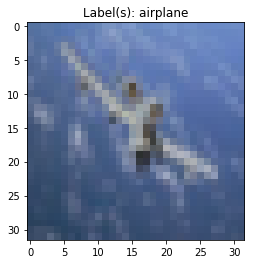

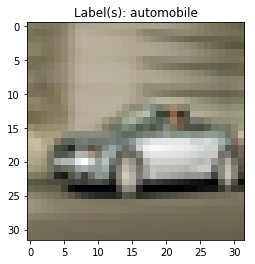

<module 'matplotlib.pyplot' from '/Users/evariste/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [4]:
D_train.show_image(1)
D_train.show_image(11)

In [5]:
class_labels=D_train.get_class_labels()
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<div style="background:#cfdfff">
    <h1>Step 3: Building a predictive model</h1>
    <p>
We provide a simple example of predictive model in the `AutoDL_sample_code_submission/` directory. You can change it to another example by copying other examples from AutoDL_simple_baseline_models.
</div>

In [6]:
my_chosen_model = join(simple_dir, 'linear.py')  # all_zero.py, linear.py, or 2dcnn.py
my_submitted_model = join(model_dir, 'model.py') # submitted models must be called model.py
!cp $my_chosen_model $my_submitted_model
!rm -r checkpoints*                              # clean up previous models

In [7]:
from model import Model
??Model
time_budget=100
M = Model(D_train.get_metadata())

MODEL INFO: 19-03-19 17:52:06 The dataset miniciao has 82 training examples and 10 classes.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_code_submission/../checkpoints_miniciao', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1223af5c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_

In [8]:
M.train(D_train.get_dataset(),
                  remaining_time_budget=time_budget)

MODEL INFO: 19-03-19 17:52:06 Begin training for another 10 steps...
MODEL INFO: 19-03-19 17:52:06 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-19 17:52:06 Tensor shape after preprocessing: (1, 32, 32, 3)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_code_submission/../checkpoints_miniciao/model.ckpt.
INFO:tensorflow:loss = 224.18816, step = 1
INFO:tensorflow:Saving checkpoints for 10 into /Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_code_submission/../checkpoints_miniciao/model.ckpt.
INFO:tensorflow:Loss for final step: 132.64198.
MODEL INFO: 19-03-19 17:52:07 10 steps trained. 1.24 sec used

In [9]:
prediction = M.test(D_test.get_dataset(), remaining_time_budget=time_budget)

MODEL INFO: 19-03-19 17:52:07 Model already trained for 3.658536585365854 epochs.
MODEL INFO: 19-03-19 17:52:07 Begin testing... 
MODEL INFO: 19-03-19 17:52:07 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-19 17:52:07 Tensor shape after preprocessing: (1, 32, 32, 3)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_code_submission/../checkpoints_miniciao/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
MODEL INFO: 19-03-19 17:52:07 Asserting predictions have the same number of columns...
MODEL INFO: 19-03-19 17:52:07 [+] Successfully made one prediction. 0.31 sec used. Total time used for testing: 0.31 sec. Current estimated time for test: 3.11e-01 sec.


<div style="background:#cfdfff">
<h1> Step 4: Compute score </h1> 
Compute the balanced accuracy for the chosen duration. For this challenge, you will be judged on the area under the learning curve, computed for increasing training times.
</div>

In [10]:
from score import autodl_bac
from libscores import read_array
solution_file = join(data_dir, data_name + '.solution')
solution = read_array(solution_file)
current_bac = autodl_bac(solution, prediction)
print('Number of test examples: %d \n\t\t Solution \t\t\t\t\t Prediction ' % len(solution))
[print(z) for z in zip(solution, prediction)]
print("Normalized balanced accuracy (2*BAC-1) = {:.4f}.".format(current_bac))

Number of test examples: 18 
		 Solution 					 Prediction 
(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0.00804281, 0.00431932, 0.00958577, 0.00066268, 0.01623217,
       0.00026932, 0.0003372 , 0.00246383, 0.04721666, 0.12363274],
      dtype=float32))
(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0.05134178, 0.03019629, 0.0633681 , 0.01068958, 0.10274333,
       0.01568337, 0.00886396, 0.04169127, 0.19245283, 0.2851533 ],
      dtype=float32))
(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0.02283571, 0.02270712, 0.02664666, 0.00502044, 0.02481692,
       0.00292173, 0.00373316, 0.01611462, 0.10023662, 0.27375892],
      dtype=float32))
(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0.01751542, 0.02417152, 0.07796021, 0.00801188, 0.06926689,
       0.00430315, 0.00312925, 0.01737235, 0.09869957, 0.13467118],
      dtype=float32))
(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0.01400858, 0.00776965, 0.01255897, 0.00138657, 0.06400117,
       0.00073053, 0.00085173, 0.00675058, 0.0

<div style="background:#cfdfff">
<h1> Step 5: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>AutoDL_sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
</div>

In [11]:
!python run_local_test.py -dataset_dir=$data_dir -code_dir=$model_dir

SCORING INFO: 19-03-19 17:52:15 Cleaning existing score_dir: /Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_scoring_output
INGESTION INFO: 19-03-19 17:52:18 Cleaning existing output_dir: /Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_result_submission
INGESTION INFO: 19-03-19 17:52:18 Cleaning existing checkpoints_dir: /Users/evariste/projects/autodl/codalab_competition_bundle/AutoDL_starting_kit/checkpoints_miniciao
INGESTION INFO: 19-03-19 17:52:18 ========== Ingestion program version 1 ==========
INGESTION INFO: 19-03-19 17:52:18 ************************************************
INGESTION INFO: 19-03-19 17:52:18 ******** Processing dataset Miniciao ********
INGESTION INFO: 19-03-19 17:52:18 ************************************************
INGESTION INFO: 19-03-19 17:52:18 Reading training set and test set...
SCORING INFO: 19-03-19 17:52:18 Start scoring program at Tue Mar 19 17:52:15 2019
Instruction

MODEL INFO: 19-03-19 17:52:27 Model already trained for 14.634146341463415 epochs.
MODEL INFO: 19-03-19 17:52:27 Begin testing... estimated time: 3.32e-01 sec.
MODEL INFO: 19-03-19 17:52:27 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-19 17:52:27 Tensor shape after preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-19 17:52:28 Asserting predictions have the same number of columns...
MODEL INFO: 19-03-19 17:52:28 [+] Successfully made one prediction. 0.31 sec used. Total time used for testing: 1.64 sec. Current estimated time for test: 3.28e-01 sec.
INGESTION INFO: 19-03-19 17:52:28 [+] Prediction success, time spent so far  8.79 sec
INGESTION INFO: 19-03-19 17:52:28 [+] Time left 7191.21 sec
INGESTION INFO: 19-03-19 17:52:28 Training the model...
MODEL INFO: 19-03-19 17:52:28 Begin training for another 32 steps...estimated time for this: 5.71 sec.
MODEL INFO: 19-03-19 17:52:28 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-03-19 17:52:28 Tensor sha

<div style="background:#cfdfff">
    <h1> Preparing the submission </h1>

Zip the contents of `AutoDL_sample_code_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.
</div>

In [12]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
# sample_code_submission = 'sample_code_submission_' + the_date + '.zip'
sample_code_submission = 'mysubmission.zip'
zipdir(sample_code_submission, model_dir)
print("Submit this file: " + sample_code_submission)

Submit this file: mysubmission.zip
